In [1]:
# Autoreload
%load_ext autoreload

In [2]:
import os 
# Traverse the current working directory backwards to find the  directory with name "workspace"
workspace_dir = os.getcwd()
while os.path.basename(workspace_dir) != 'ai4ar-helper':
    workspace_dir = os.path.dirname(workspace_dir)

data_dir = os.path.join(workspace_dir,'..','ai4ar-radiomics', 'data', 'trial')

In [3]:
# Add src to the path
import sys
sys.path.append(os.path.join(workspace_dir, 'src'))


In [4]:
data_dir

'd:\\workspace\\ai4ar-helper\\..\\ai4ar-radiomics\\data\\trial'

In [5]:
from ai4ar import Dataset, Case, select_slice, required_agreement, modalities

In [6]:
dataset = Dataset(data_dir)

In [7]:
dataset.case_ids

['001', '003', '004', '005']

In [8]:
case = dataset['001']


In [9]:
case.summarize()

In [10]:
case.visualize('lesion_labels/lesion1/t2w/')

lesion_labels/lesion1/t2w/*
[Image(file=d:\workspace\ai4ar-helper\..\ai4ar-radiomics\data\trial\AI4AR_cont\Lesion_labels\001\lesion1\t2w\1_lesion1_t2w_U_8ZmM76.nii.gz, image=None), Image(file=d:\workspace\ai4ar-helper\..\ai4ar-radiomics\data\trial\AI4AR_cont\Lesion_labels\001\lesion1\t2w\1_lesion1_t2w_U_OjmNZ8.nii.gz, image=None), Image(file=d:\workspace\ai4ar-helper\..\ai4ar-radiomics\data\trial\AI4AR_cont\Lesion_labels\001\lesion1\t2w\1_lesion1_t2w_U_OrjnrO.nii.gz, image=None)]


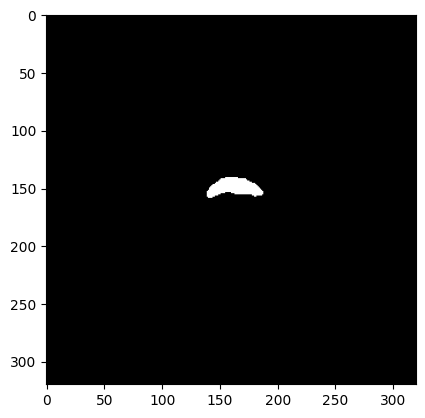

In [11]:
import matplotlib.pyplot as plt
import logging 

logging.basicConfig(level=logging.INFO)

combined_t2w_mask = case.image('lesion_labels/lesion1/t2w', combine=True, cache=False, combine_pp=required_agreement(1))
mask_arr = combined_t2w_mask.arr()
# Visualize the combined mask

plt.imshow(mask_arr[select_slice(mask_arr)], cmap='gray', vmin=0, vmax=1)

In [12]:
case.data.match('lesion_labels/lesion1/t2w/*')

[Image(file=d:\workspace\ai4ar-helper\..\ai4ar-radiomics\data\trial\AI4AR_cont\Lesion_labels\001\lesion1\t2w\1_lesion1_t2w_U_8ZmM76.nii.gz, image=Image (0000019C19526330)
   RTTI typeinfo:   class itk::Image<unsigned short,3>
   Reference Count: 1
   Modified Time: 1883
   Debug: Off
   Object Name: 
   Observers: 
     none
   Source: (none)
   Source output name: (none)
   Release Data: Off
   Data Released: False
   Global Release Data: Off
   PipelineMTime: 1858
   UpdateMTime: 1879
   RealTimeStamp: 0 seconds 
   LargestPossibleRegion: 
     Dimension: 3
     Index: [0, 0, 0]
     Size: [320, 320, 35]
   BufferedRegion: 
     Dimension: 3
     Index: [0, 0, 0]
     Size: [320, 320, 35]
   RequestedRegion: 
     Dimension: 3
     Index: [0, 0, 0]
     Size: [320, 320, 35]
   Spacing: [0.78125, 0.78125, 5.2]
   Origin: [-137.771, -153.894, -40.9317]
   Direction: 
 1 0 0
 0 1 0
 0 0 1
 
   IndexToPointMatrix: 
 0.78125 0 0
 0 0.78125 0
 0 0 5.2
 
   PointToIndexMatrix: 
 1.28 0 0
 0

In [13]:
dataset.clinical_metadata

,patient_id,patient_age,mri_source,clinical_group,prior_biopsies,dre_result,psa_result,prostate_volume_us,psa_density_us,prostate_volume_mri,...,isup_group,tnm_pathological_t,postoperative_margin,gs_post,isup_grade_post,tnm_pathological_t_post,tnm_pathological_n_post,tnm_pathological_m_post,eau_risk,treatment
0,1,71,DCO,TN,2,0,17.2,64.8,0.27,47.9,...,NaN,t0,0,NaN,NaN,NaN,NaN,NaN,IR_L,B
1,3,67,DCO,TN,3,1,9.9,20.0,0.50,17.1,...,1.0,t2b,0,NaN,NaN,NaN,NaN,NaN,LR_L,R
2,4,68,DCO,TN,2,0,88.9,60.0,1.48,57.1,...,1.0,t2c,1,3+4,2.0,t2c,n0,mx,IR_L,P
3,5,70,DCO,TN,1,1,0.8,73.0,0.01,50.5,...,NaN,t0,0,NaN,NaN,NaN,NaN,NaN,NaN,B


In [14]:
dataset.radiological_metadata

,patient_id,radiologist_id,lesion_id,TBx,dimension,lesion_dim_sequence,lesion_sectors,lesion_sectors_simple,lesion_zones,lesion_originating,...,label_cor,label_hbv,label_sag,label_t2w,label_dce1,label_dce2,label_dce3,label_dce4,label_dce5,label_dce6
0,1,U_OjmNZ8,1,0,16,T2W,"AS-left-in-mid,TZa-left-in-mid","AS,TZa","AS,TZ",TZ,...,NaN,lesion_labels/lesion1/hbv/OjmNZ8,NaN,lesion_labels/lesion1/t2w/OjmNZ8,NaN,NaN,NaN,NaN,NaN,NaN
1,1,U_8ZmM76,1,0,29,T2W,"AS-right-in-base,TZa-right-in-base,AS-left-in-...","AS,TZa","AS,TZ",TZ,...,NaN,lesion_labels/lesion1/hbv/8ZmM76,NaN,lesion_labels/lesion1/t2w/8ZmM76,NaN,NaN,NaN,NaN,NaN,NaN
2,1,U_OrjnrO,1,0,31,T2W,"AS-left-in-apex,AS-left-in-mid,AS-right-in-mid...",AS,AS,TZ,...,NaN,lesion_labels/lesion1/hbv/OrjnrO,NaN,lesion_labels/lesion1/t2w/OrjnrO,NaN,NaN,lesion_labels/lesion1/dce3/OrjnrO,NaN,NaN,NaN
3,3,U_8ekGLQ,1,1,18,ADC,"AS-left-in-base,TZa-left-in-base,TZa-left-in-mid","AS,TZa","AS,TZ",TZ,...,NaN,lesion_labels/lesion1/hbv/8ekGLQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,U_OjmNZ8,1,1,15,ADC,"TZa-left-in-base,TZa-left-in-mid,AS-left-in-base","TZa,AS","TZ,AS",TZ,...,NaN,lesion_labels/lesion1/hbv/OjmNZ8,NaN,NaN,NaN,NaN,lesion_labels/lesion1/dce3/OjmNZ8,NaN,NaN,NaN
5,3,U_8ZmM76,1,1,18,ADC,"TZa-left-in-base,TZp-left-in-base","TZa,TZp",TZ,TZ,...,NaN,lesion_labels/lesion1/hbv/8ZmM76,NaN,lesion_labels/lesion1/t2w/8ZmM76,NaN,NaN,lesion_labels/lesion1/dce3/8ZmM76,NaN,NaN,NaN
6,3,U_8ekGLQ,2,1,9,ADC,PZpl-left-in-mid,PZpl,PZ,PZ,...,NaN,lesion_labels/lesion2/hbv/8ekGLQ,NaN,lesion_labels/lesion2/t2w/8ekGLQ,NaN,NaN,lesion_labels/lesion2/dce3/8ekGLQ,NaN,NaN,NaN
7,3,U_OjmNZ8,2,1,7,ADC,PZpl-left-in-apex,PZpl,PZ,PZ,...,NaN,lesion_labels/lesion2/hbv/OjmNZ8,NaN,lesion_labels/lesion2/t2w/OjmNZ8,NaN,NaN,lesion_labels/lesion2/dce3/OjmNZ8,NaN,NaN,NaN
8,3,U_8ZmM76,2,1,9,ADC,PZpl-left-in-mid,PZpl,PZ,PZ,...,NaN,lesion_labels/lesion2/hbv/8ZmM76,NaN,lesion_labels/lesion2/t2w/8ZmM76,NaN,NaN,lesion_labels/lesion2/dce3/8ZmM76,NaN,NaN,NaN
9,4,U_8ekGLQ,1,1,37,ADC,"TZa-right-in-base,AS-right-in-base,AS-right-in...","TZa,AS","TZ,AS",TZ,...,NaN,lesion_labels/lesion1/hbv/8ekGLQ,NaN,lesion_labels/lesion1/t2w/8ekGLQ,NaN,NaN,lesion_labels/lesion1/dce3/8ekGLQ,NaN,NaN,NaN


In [15]:
case.clinical_metadata()

,patient_id,patient_age,mri_source,clinical_group,prior_biopsies,dre_result,psa_result,prostate_volume_us,psa_density_us,prostate_volume_mri,...,isup_group,tnm_pathological_t,postoperative_margin,gs_post,isup_grade_post,tnm_pathological_t_post,tnm_pathological_n_post,tnm_pathological_m_post,eau_risk,treatment
0,1,71,DCO,TN,2,0,17.2,64.8,0.27,47.9,...,NaN,t0,0,NaN,NaN,NaN,NaN,NaN,IR_L,B
